In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

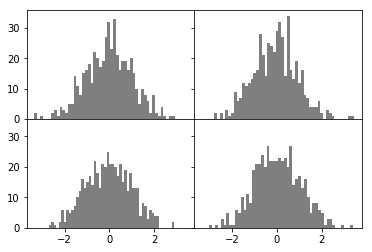

In [39]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

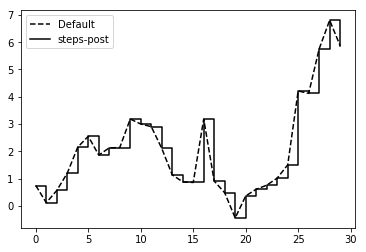

In [42]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

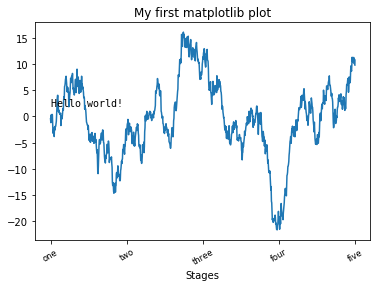

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.text(2, 2, 'Hello world!', family='monospace', fontsize=10)

fig.show()

In [52]:
suit = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [53]:
deck[:10]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
dtype: int64

In [54]:
def draw(deck, n=5):
    return deck.sample(n)

In [55]:
draw(deck)

10S    10
JH     10
KD     10
AH      1
4H      4
dtype: int64

In [56]:
get_suit = lambda card: card[-1]

In [62]:
deck.groupby(get_suit).apply(draw, n=2)

C  4C    4
   2C    2
D  AD    1
   9D    9
H  5H    5
   6H    6
S  8S    8
   AS    1
dtype: int64

### 分组加权平均数和相关系数

In [70]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                    'b', 'b', 'b', 'b'],
                    'data': np.random.randn(8),
                    'weights': np.random.rand(8)})

In [71]:
df

,category,data,weights
0,a,-0.923107,0.815636
1,a,-0.317370,0.730974
2,a,-0.827917,0.868009
3,a,-0.940442,0.126720
4,b,1.750994,0.304820
5,b,0.300131,0.653648
6,b,0.402808,0.247916
7,b,0.177119,0.854090


In [72]:
grouped =df.groupby('category')

In [73]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [74]:
grouped.apply(get_wavg)

category
a   -0.717228
b    0.476131
dtype: float64

In [1]:
from datetime import datetime

In [4]:
now = datetime.now()

In [5]:
now

datetime.datetime(2019, 7, 14, 11, 52, 14, 610276)

In [8]:
now.year, now.month, now.day

(2019, 7, 14)

In [11]:
delta = datetime(2019, 7, 14) - datetime(1993, 12, 3, 8, 10)

In [12]:
delta

datetime.timedelta(9353, 57000)

In [15]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.698421
2011-01-05   -0.993284
2011-01-07    1.368333
2011-01-08   -0.325739
2011-01-10   -1.218957
2011-01-12   -1.069301
dtype: float64

In [16]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.698421
2011-01-05   -0.993284
2011-01-07    1.368333
2011-01-08   -0.325739
dtype: float64

In [17]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [18]:
dates[:10]

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')

In [19]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [20]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.072265,0.369284,-0.495033,-1.980174
2001-05-09,-0.332750,1.567283,-1.009667,1.917665
2001-05-16,-0.399888,-0.001445,-0.045331,1.255296
2001-05-23,-0.732927,2.094878,-0.541602,0.687333
2001-05-30,-1.212478,-0.917471,-2.216902,0.113060


# Examples

## 1.USA.gov Data from Bitly

In [1]:
path = "./pydata-book-2nd-edition/datasets/bitly_usagov/example.txt"

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path)]

In [5]:
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'}]

用纯python代码对时区进行计数

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
def get_counts(sequences):
    counts = {}
    for x in sequences:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [9]:
counts = get_counts(time_zones)

In [11]:
counts['America/Los_Angeles']

382

In [12]:
from collections import defaultdict

def get_counts2(sequences):
    counts = defaultdict(int)
    for x in sequences:
        counts[x] += 1
    return counts

In [13]:
counts = get_counts2(time_zones)

In [14]:
counts['America/Los_Angeles']

382

In [15]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [18]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

用python对时区进行计数

In [19]:
import pandas as pd

In [20]:
frame = pd.DataFrame(records)

In [21]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [22]:
tz_counts = frame['tz'].value_counts()

In [24]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
clean_tz = frame['tz'].fillna('Missing')

In [28]:
clean_tz[clean_tz==''] = 'Unknown'

In [29]:
clean_tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7              Unknown
8              Unknown
9              Unknown
Name: tz, dtype: object

In [33]:
tz_counts = clean_tz.value_counts()

In [30]:
import seaborn as sns

In [34]:
subset = tz_counts[:10]

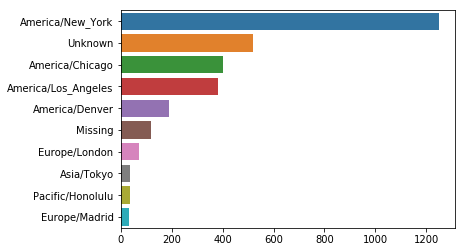

In [35]:
sns.barplot(y=subset.index, x=subset.values)